In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [24]:
# 한글 시각화를 위한 seaborn 폰트설정
plt.rcParams['axes.unicode_minus'] = False
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(context='notebook',
              style='darkgrid',
              palette='pastel',
              font='Malgun Gothic',
              rc=custom_params)

In [25]:
aisles = pd.read_csv("aisles.csv")
dep = pd.read_csv("departments.csv")
prior = pd.read_csv("order_products__prior.csv")
train = pd.read_csv("order_products__train.csv")
order = pd.read_csv("orders.csv")
product = pd.read_csv("products.csv")
submission = pd.read_csv("sample_submission.csv")

In [26]:
def reduce_mem_usage(train_data):
    
#  iterate through all the columns of a dataframe and modify the data type to reduce memory usage."""
    start_mem = train_data.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in train_data.columns:
        col_type = train_data[col].dtype

        if col_type != object:
            c_min = train_data[col].min()
            c_max = train_data[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    train_data[col] = train_data[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    train_data[col] = train_data[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    train_data[col] = train_data[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    train_data[col] = train_data[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    train_data[col] = train_data[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    train_data[col] = train_data[col].astype(np.float32)
                else:
                    train_data[col] = train_data[col].astype(np.float64)
        else:
            train_data[col] = train_data[col].astype('category')
        end_mem = train_data.memory_usage().sum() / 1024**2
        print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
        print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return train_data

In [27]:
reduce_mem_usage(prior)
reduce_mem_usage(train)
reduce_mem_usage(product)
reduce_mem_usage(order)
reduce_mem_usage(dep)
reduce_mem_usage(aisles)

Memory usage of dataframe is 989.82 MB
Memory usage after optimization is: 866.09 MB
Decreased by 12.5%
Memory usage after optimization is: 742.37 MB
Decreased by 25.0%
Memory usage after optimization is: 556.78 MB
Decreased by 43.7%
Memory usage after optimization is: 340.25 MB
Decreased by 65.6%
Memory usage of dataframe is 42.26 MB
Memory usage after optimization is: 36.97 MB
Decreased by 12.5%
Memory usage after optimization is: 31.69 MB
Decreased by 25.0%
Memory usage after optimization is: 22.45 MB
Decreased by 46.9%
Memory usage after optimization is: 13.20 MB
Decreased by 68.7%
Memory usage of dataframe is 1.52 MB
Memory usage after optimization is: 1.33 MB
Decreased by 12.5%
Memory usage after optimization is: 2.52 MB
Decreased by -66.5%
Memory usage after optimization is: 2.24 MB
Decreased by -47.7%
Memory usage after optimization is: 1.91 MB
Decreased by -25.8%
Memory usage of dataframe is 182.71 MB
Memory usage after optimization is: 169.66 MB
Decreased by 7.1%
Memory usage

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


In [28]:
submission

,order_id,products
0,17,39276 29259
1,34,39276 29259
2,137,39276 29259
3,182,39276 29259
4,257,39276 29259
...,...,...
74995,3420740,39276 29259
74996,3420877,39276 29259
74997,3420888,39276 29259
74998,3420989,39276 29259


In [29]:
aisles

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


In [30]:
dep

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [31]:
product

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


In [32]:
product[product['department_id'] == 21]

,product_id,product_name,aisle_id,department_id
37,38,Ultra Antibacterial Dish Liquid,100,21
71,72,Organic Honeycrisp Apples,100,21
109,110,Uncured Turkey Bologna,100,21
296,297,"Write Bros Ball Point Pens, Cap-Pen, Medium (1...",100,21
416,417,Classics Baby Binks Easter Chocolate Bunny,100,21
...,...,...,...,...
49552,49553,Organic Plain Skyr,100,21
49574,49575,Chocolate Vanilla Malt Custard,100,21
49640,49641,"8\"" Pecan Pie",100,21
49663,49664,Lemon Cayenne Drinking Vinegar,100,21


In [33]:
print(prior.shape)
prior

(32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1


In [34]:
train

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
...,...,...,...,...
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1


In [35]:
print(len(prior) + len(train))
ot = pd.concat([prior, train])
ot = ot.sort_values(by='order_id').reset_index(drop=True)
ot

33819106


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,10246,3,0
2,1,49683,4,0
3,1,43633,5,1
4,1,13176,6,0
...,...,...,...,...
33819101,3421083,35211,5,0
33819102,3421083,39678,6,1
33819103,3421083,11352,7,0
33819104,3421083,4600,8,0


In [36]:
print(order.shape)
order

(3421083, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


In [37]:
print(train['order_id'].nunique())
print(len(order[order['eval_set'] == 'train']))
print(len(order[order['eval_set'] == 'test']))

131209
131209
75000


In [38]:
item_info = pd.merge(product, aisles, on ="aisle_id")
item_info.head()

,product_id,product_name,aisle_id,department_id,aisle
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes
1,78,Nutter Butter Cookie Bites Go-Pak,61,19,cookies cakes
2,102,Danish Butter Cookies,61,19,cookies cakes
3,172,Gluten Free All Natural Chocolate Chip Cookies,61,19,cookies cakes
4,285,Mini Nilla Wafers Munch Pack,61,19,cookies cakes


In [39]:
item_info = pd.merge(item_info, dep, on="department_id")
item_info

,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,78,Nutter Butter Cookie Bites Go-Pak,61,19,cookies cakes,snacks
2,102,Danish Butter Cookies,61,19,cookies cakes,snacks
3,172,Gluten Free All Natural Chocolate Chip Cookies,61,19,cookies cakes,snacks
4,285,Mini Nilla Wafers Munch Pack,61,19,cookies cakes,snacks
...,...,...,...,...,...,...
49683,22827,Organic Black Mission Figs,18,10,bulk dried fruits vegetables,bulk
49684,28655,Crystallized Ginger Chunks,18,10,bulk dried fruits vegetables,bulk
49685,30365,Vegetable Chips,18,10,bulk dried fruits vegetables,bulk
49686,38007,Naturally Sweet Plantain Chips,18,10,bulk dried fruits vegetables,bulk


In [40]:
df = pd.merge(item_info, ot, on="product_id")
print(df.shape)
df

(33819106, 9)


,product_id,product_name,aisle_id,department_id,aisle,department,order_id,add_to_cart_order,reordered
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,1107,7,0
1,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,5319,3,1
2,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,6695,7,1
3,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,7540,4,1
4,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,9228,2,0
...,...,...,...,...,...,...,...,...,...
33819101,48778,"Fit Super A Juice, Cold Pressed, Carrot/Apple/...",18,10,bulk dried fruits vegetables,bulk,3054471,19,1
33819102,48778,"Fit Super A Juice, Cold Pressed, Carrot/Apple/...",18,10,bulk dried fruits vegetables,bulk,3136178,12,0
33819103,48778,"Fit Super A Juice, Cold Pressed, Carrot/Apple/...",18,10,bulk dried fruits vegetables,bulk,3174062,10,0
33819104,48778,"Fit Super A Juice, Cold Pressed, Carrot/Apple/...",18,10,bulk dried fruits vegetables,bulk,3220368,16,0


In [41]:
df = pd.merge(df, order, on='order_id')
print(df.shape)
df

(33819106, 15)


,product_id,product_name,aisle_id,department_id,aisle,department,order_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,1107,7,0,38259,prior,2,1,11,7.0
1,46149,Zero Calorie Cola,77,7,soft drinks,beverages,1107,6,0,38259,prior,2,1,11,7.0
2,9434,Bag of Large Lemons,34,1,frozen meat seafood,frozen,1107,2,0,38259,prior,2,1,11,7.0
3,769,Sliced American Cheese,21,16,packaged cheese,dairy eggs,1107,10,0,38259,prior,2,1,11,7.0
4,12078,Shredded Mexican Blend Cheese,21,16,packaged cheese,dairy eggs,1107,9,0,38259,prior,2,1,11,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33819101,30365,Vegetable Chips,18,10,bulk dried fruits vegetables,bulk,2323735,1,1,90235,prior,30,3,10,1.0
33819102,30365,Vegetable Chips,18,10,bulk dried fruits vegetables,bulk,2733396,1,0,30511,prior,24,4,11,0.0
33819103,30365,Vegetable Chips,18,10,bulk dried fruits vegetables,bulk,3152383,1,0,10113,train,12,3,19,13.0
33819104,48778,"Fit Super A Juice, Cold Pressed, Carrot/Apple/...",18,10,bulk dried fruits vegetables,bulk,31522,1,1,31188,prior,3,3,11,4.0


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33819106 entries, 0 to 33819105
Data columns (total 15 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   product_id              int32   
 1   product_name            category
 2   aisle_id                int16   
 3   department_id           int8    
 4   aisle                   category
 5   department              category
 6   order_id                int32   
 7   add_to_cart_order       int16   
 8   reordered               int8    
 9   user_id                 int32   
 10  eval_set                category
 11  order_number            int8    
 12  order_dow               int8    
 13  order_hour_of_day       int8    
 14  days_since_prior_order  float16 
dtypes: category(4), float16(1), int16(2), int32(3), int8(5)
memory usage: 1001.2 MB


In [43]:
df.isnull().sum()

product_id                      0
product_name                    0
aisle_id                        0
department_id                   0
aisle                           0
department                      0
order_id                        0
add_to_cart_order               0
reordered                       0
user_id                         0
eval_set                        0
order_number                    0
order_dow                       0
order_hour_of_day               0
days_since_prior_order    2078068
dtype: int64

In [44]:
df.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'aisle',
       'department', 'order_id', 'add_to_cart_order', 'reordered', 'user_id',
       'eval_set', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order'],
      dtype='object')

In [45]:
# df.rename(columns={'product_id' : '제품번호', 'product_name' : '제품명', 'aisle_id' : '통로번호', 'department_id': '부서번호', 'department' : '카테고리', 'aisle' : '통로이름', 'order_id': '주문번호'}, inplace = True)
# df.head()

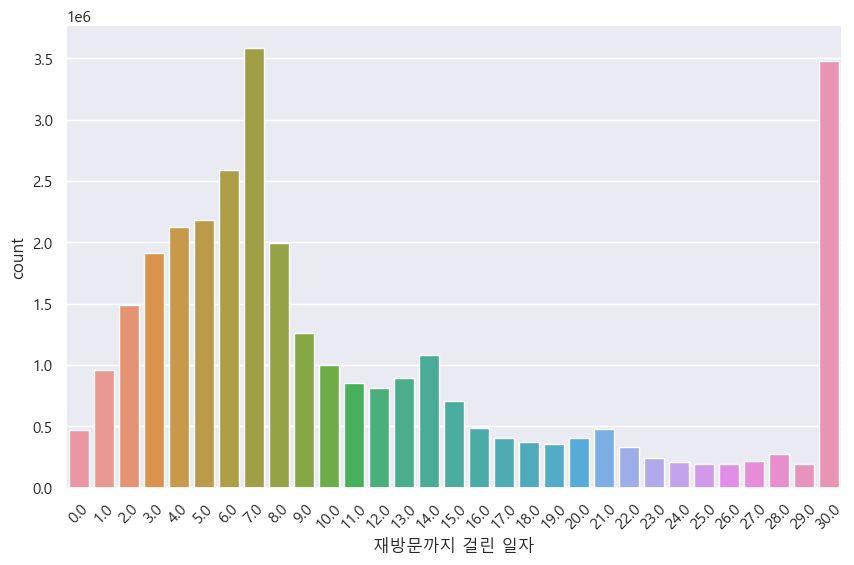

In [46]:
df['days_since_prior_order'] = df['days_since_prior_order'].astype('float32')
plt.figure(figsize=(10, 6))

sns.countplot(data = df, x = 'days_since_prior_order')
plt.xlabel('재방문까지 걸린 일자')
plt.xticks(rotation=45)

plt.show()

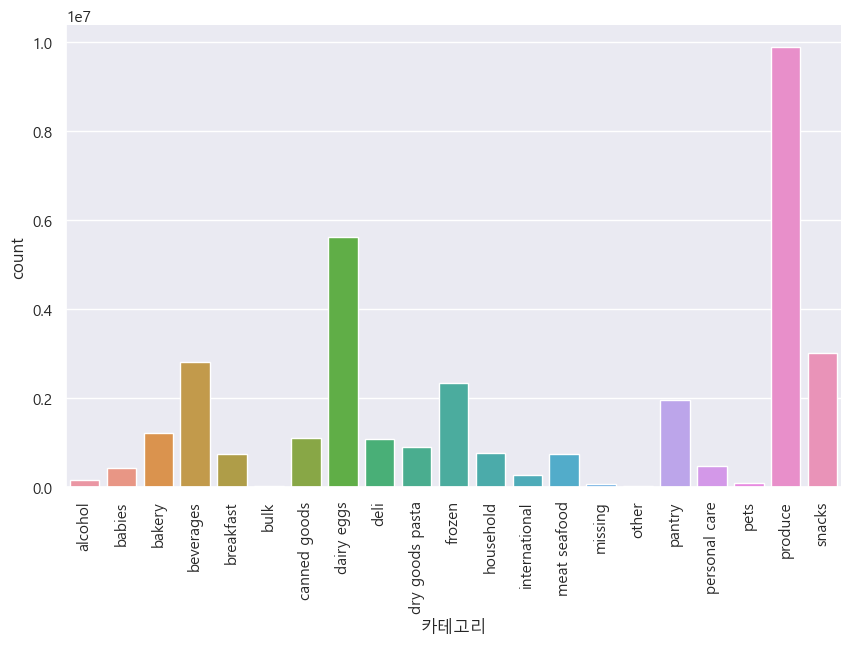

In [47]:
plt.figure(figsize=(10, 6))

sns.countplot(data = df, x = 'department')
plt.xlabel('카테고리')
plt.xticks(rotation=90)

plt.show()

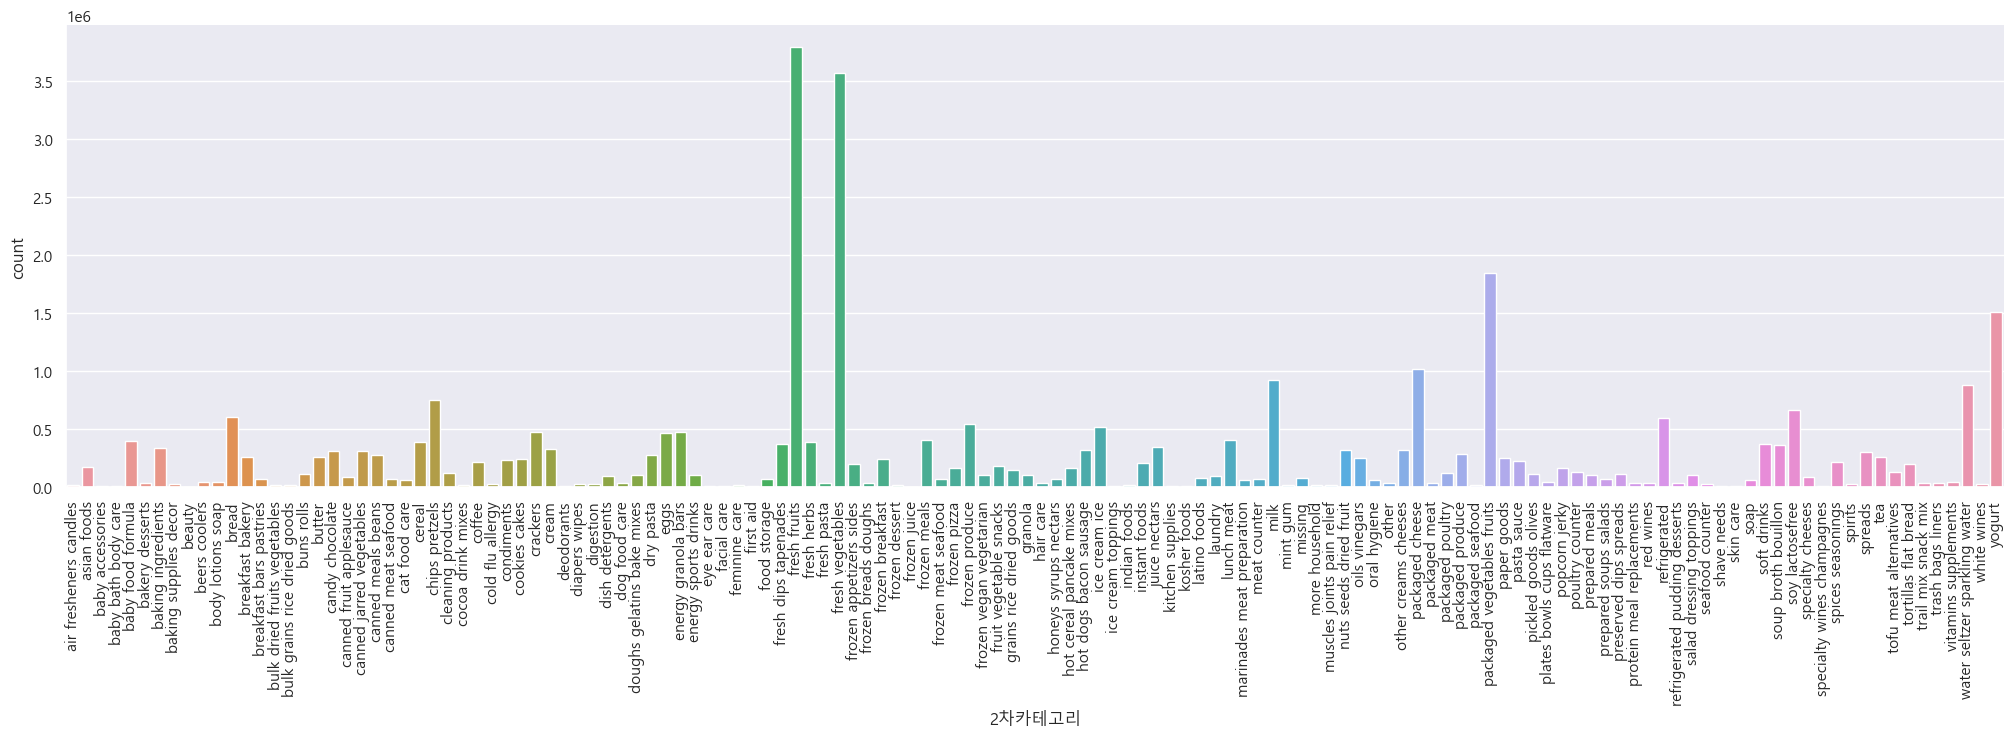

In [48]:
plt.figure(figsize=(25, 6))

sns.countplot(data = df, x = 'aisle')
plt.xlabel('2차카테고리')
plt.xticks(rotation=90)

plt.show()

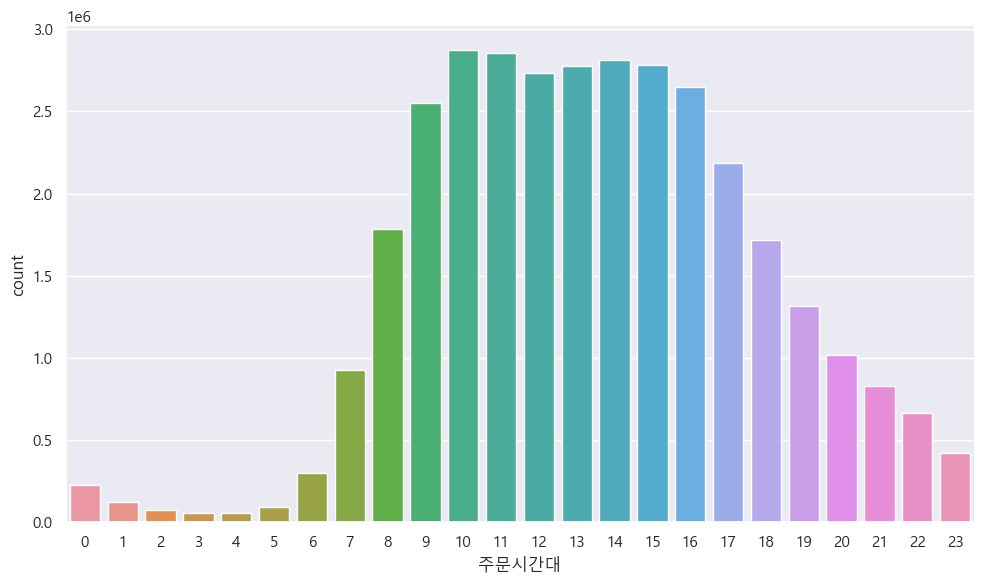

In [49]:
plt.figure(figsize=(10, 6))

sns.countplot(data = df, x = 'order_hour_of_day')
plt.xlabel('주문시간대')
plt.tight_layout()

plt.show()

In [50]:
top_product = df['product_name'].value_counts().head(10)
top_product

product_name
Banana                    491291
Bag of Organic Bananas    394930
Organic Strawberries      275577
Organic Baby Spinach      251705
Organic Hass Avocado      220877
Organic Avocado           184224
Large Lemon               160792
Strawberries              149445
Limes                     146660
Organic Whole Milk        142813
Name: count, dtype: int64

In [51]:
# plt.figure(figsize=(10, 6)) 
# 
# sns.barplot(x=top_product.index, y=top_product.values)
# plt.title('판매상품 탑10')
# plt.xlabel('상품명')
# plt.ylabel('판매횟수')
# 
# plt.xticks(rotation=45) 
# plt.tight_layout()
# 
# plt.show()

In [52]:
product_reorder_counts = df.groupby('product_name')['reordered'].agg(['sum', 'count'])
product_reorder_counts.columns = ['reordered_count', 'total_count']

product_reorder_counts['reorder_ratio'] = product_reorder_counts['reordered_count'] / product_reorder_counts['total_count']

top_reorder_ratio = product_reorder_counts.sort_values(by='reorder_ratio', ascending=False).head(30)
top_reorder_ratio

,reordered_count,total_count,reorder_ratio
product_name,,,
Raw Veggie Wrappers,65,69,0.942029
Serenity Ultimate Extrema Overnight Pads,84,90,0.933333
Orange Energy Shots,12,13,0.923077
Chocolate Love Bar,94,102,0.921569
Soy Powder Infant Formula,32,35,0.914286
Simply Sleep Nighttime Sleep Aid,41,45,0.911111
"Energy Shot, Grape Flavor",20,22,0.909091
Russian River Valley Reserve Pinot Noir,27,30,0.900000
Bars Peanut Butter,62,69,0.898551


In [53]:
# plt.figure(figsize=(10, 6))
# 
# sns.barplot(data = top_reorder_ratio, x=top_reorder_ratio.index, y='reorder_ratio')
# plt.title('재주문비율 탑10')
# plt.xlabel('상품명')
# plt.ylabel('재주문비율')
# plt.ylim(0.88, 0.95)
# plt.xticks(rotation=45)
# plt.tight_layout()
# 
# plt.show()

In [54]:
result_df = product[product['product_name'].str.contains('Banana')].reset_index(drop=True)
result_df

,product_id,product_name,aisle_id,department_id
0,63,Banana & Sweet Potato Organic Teething Wafers,92,18
1,313,Peppermint/Banana Split Variety Pack Frozen Da...,37,1
2,426,2nd Foods Bananas,92,18
3,602,Banana Chocolate Chip,52,1
4,849,Blueberry & Banana Tiny Fruits Freeze Dried Sn...,92,18
...,...,...,...,...
371,49201,"Banana, Peach and Mango Fruit Pouch",92,18
372,49310,Oatmeal & Banana Baby Cereal,92,18
373,49337,Stage 2 Banana Sweet Pea Papaya Baby Food,92,18
374,49498,Beeswax & Banana Hand Creme,127,11


In [55]:
organic_df = product[product['product_name'].str.contains('Organic')].reset_index(drop=True)
organic_df

,product_id,product_name,aisle_id,department_id
0,23,Organic Turkey Burgers,49,12
1,33,Organic Spaghetti Style Pasta,131,9
2,41,Organic Sourdough Einkorn Crackers Rosemary,78,19
3,43,Organic Clementines,123,4
4,47,Onion Flavor Organic Roasted Seaweed Snack,66,6
...,...,...,...,...
5030,49606,Organic Natural Red,28,5
5031,49608,Certified Organic Spanish Style Rice With Quin...,4,9
5032,49638,Organic Superfirm Vacuum Packed Tofu,14,20
5033,49653,Organic Aromatherapeutic Moroccan Argan Oil Set,25,11


In [56]:
coffee_df = product[product['product_name'].str.contains('Coffee')].reset_index(drop=True)
coffee_df

,product_id,product_name,aisle_id,department_id
0,69,Vanilla with Almond Milk Iced Coffee,26,7
1,197,Cold Brew Coffee Tahitian Vanilla,26,7
2,232,Blue Bottle Coffee Frozen Bar,37,1
3,522,Coffee Liqueur,124,5
4,700,Jet Fuel Dark Roast Whole Bean Coffee,26,7
...,...,...,...,...
781,49361,3 Best Friends Coffee Vanilla Lager,27,5
782,49423,Cinnamon Coffee Cake,100,21
783,49463,Organic Whole Bean Coffee,26,7
784,49536,Café de Olla Instant Coffee,26,7


In [57]:
df[df['product_name'] == 'Raw Veggie Wrappers']

,product_id,product_name,aisle_id,department_id,aisle,department,order_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
4035444,6433,Raw Veggie Wrappers,13,20,prepared meals,deli,1066363,6,0,9239,prior,2,1,11,4.0
4172049,6433,Raw Veggie Wrappers,13,20,prepared meals,deli,406271,5,1,21777,prior,28,5,11,3.0
4175070,6433,Raw Veggie Wrappers,13,20,prepared meals,deli,557046,1,1,21777,prior,13,0,8,3.0
4178496,6433,Raw Veggie Wrappers,13,20,prepared meals,deli,745820,6,1,21777,prior,61,5,8,3.0
4183316,6433,Raw Veggie Wrappers,13,20,prepared meals,deli,993399,1,1,21777,prior,19,6,6,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33778972,6433,Raw Veggie Wrappers,13,20,prepared meals,deli,158445,1,1,21777,prior,88,3,13,10.0
33778973,6433,Raw Veggie Wrappers,13,20,prepared meals,deli,376904,1,1,21777,prior,22,1,10,2.0
33778974,6433,Raw Veggie Wrappers,13,20,prepared meals,deli,899999,1,1,21777,prior,77,1,11,3.0
33778975,6433,Raw Veggie Wrappers,13,20,prepared meals,deli,999858,1,1,21777,prior,51,1,9,1.0


In [67]:
df_21777 = df[df['user_id'] == 21777]
df_21777

,product_id,product_name,aisle_id,department_id,aisle,department,order_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
4169004,10753,Peanut Butter Bar,3,19,energy granola bars,snacks,244525,7,1,21777,prior,36,0,23,6.0
4169005,18963,Apple Cider Vinegar,19,13,oils vinegars,pantry,244525,5,1,21777,prior,36,0,23,6.0
4169006,42671,Organic Brushing Rinse Peppermint,20,11,oral hygiene,personal care,244525,6,1,21777,prior,36,0,23,6.0
4169007,26259,Sound Sleep Vegetarian Liquid Phyto-Caps,47,11,vitamins supplements,personal care,244525,9,0,21777,prior,36,0,23,6.0
4169008,17953,Organic Hemp Rose Pure Castille Bar Soap,25,11,soap,personal care,244525,3,0,21777,prior,36,0,23,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33778972,6433,Raw Veggie Wrappers,13,20,prepared meals,deli,158445,1,1,21777,prior,88,3,13,10.0
33778973,6433,Raw Veggie Wrappers,13,20,prepared meals,deli,376904,1,1,21777,prior,22,1,10,2.0
33778974,6433,Raw Veggie Wrappers,13,20,prepared meals,deli,899999,1,1,21777,prior,77,1,11,3.0
33778975,6433,Raw Veggie Wrappers,13,20,prepared meals,deli,999858,1,1,21777,prior,51,1,9,1.0


In [68]:
product_21777 = df_21777['product_name'].value_counts()
product_21777

product_name
Raw Veggie Wrappers                                                65
Dark Roast Cold Brew Coffee Concentrate                            32
Pure Coconut Milk                                                  24
Organic Premium Roasted Seaweed Snack                              21
Lightly Salted Toasted Coconut Chips                               12
                                                                   ..
Garbage Disposal Freshener & Cleaner Red Pear with Magnolia         0
Garbage Disposal Freshener And Cleaner Tangerine w/ Lemon Grass     0
Garbage Disposal Freshner & Cleaner, Thyme with Fig Leaf            0
Garbage Disposer Cleaner & Deodorizer, Fresh Lemon                  0
with a Splash of Pineapple Coconut Water                            0
Name: count, Length: 49688, dtype: int64

In [69]:
category_21777 = df_21777['department'].value_counts()
category_21777

department
snacks             89
deli               80
international      54
beverages          43
personal care      31
pantry             28
produce            20
dairy eggs         14
household          13
babies             12
breakfast           9
pets                9
dry goods pasta     5
bakery              1
other               0
alcohol             0
missing             0
meat seafood        0
canned goods        0
bulk                0
frozen              0
Name: count, dtype: int64

In [70]:
product[product['department_id'] == 20]

,product_id,product_name,aisle_id,department_id
48,49,Vegetarian Grain Meat Sausages Italian - 4 CT,14,20
61,62,Premium Deli Oven Roasted Turkey Breast,96,20
73,74,Artisan Chick'n & Apple Sausage,14,20
84,85,Soppressata Piccante,96,20
108,109,Grape Leaf Hummus Wrap,13,20
...,...,...,...,...
49553,49554,Roasted Garlic Hommus,67,20
49559,49560,Selects Natural Slow Roasted Chicken Breast,96,20
49580,49581,Pinto Bean and Cheese Pupusa,13,20
49604,49605,Classic Hummus Family Size,67,20


In [71]:
df[df['product_name'] == 'Serenity Ultimate Extrema Overnight Pads']

,product_id,product_name,aisle_id,department_id,aisle,department,order_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
180881,2075,Serenity Ultimate Extrema Overnight Pads,126,11,feminine care,personal care,1198245,4,1,119515,prior,30,5,9,4.0
185187,2075,Serenity Ultimate Extrema Overnight Pads,126,11,feminine care,personal care,2073736,5,1,119515,prior,31,1,11,3.0
188047,2075,Serenity Ultimate Extrema Overnight Pads,126,11,feminine care,personal care,2593992,7,1,119515,prior,87,2,12,0.0
326426,2075,Serenity Ultimate Extrema Overnight Pads,126,11,feminine care,personal care,345211,6,1,119515,prior,84,6,12,4.0
326641,2075,Serenity Ultimate Extrema Overnight Pads,126,11,feminine care,personal care,590238,1,1,119515,prior,19,3,11,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31090451,2075,Serenity Ultimate Extrema Overnight Pads,126,11,feminine care,personal care,2961004,3,1,119515,prior,45,5,14,2.0
31090456,2075,Serenity Ultimate Extrema Overnight Pads,126,11,feminine care,personal care,3115492,2,1,119515,prior,43,1,12,3.0
31090459,2075,Serenity Ultimate Extrema Overnight Pads,126,11,feminine care,personal care,3246615,4,1,119515,prior,17,2,1,1.0
31090464,2075,Serenity Ultimate Extrema Overnight Pads,126,11,feminine care,personal care,3302632,1,1,119515,prior,22,2,11,2.0


In [72]:
df_119515 = df[df['user_id'] == 119515]
df_119515

,product_id,product_name,aisle_id,department_id,aisle,department,order_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
180877,3061,Swiss Rolls,61,19,cookies cakes,snacks,1198245,2,1,119515,prior,30,5,9,4.0
180878,5853,Ho Hos Cakes,61,19,cookies cakes,snacks,1198245,1,1,119515,prior,30,5,9,4.0
180879,34986,Little Bites Blueberry Muffin Pouches,61,19,cookies cakes,snacks,1198245,3,1,119515,prior,30,5,9,4.0
180880,27796,Real Mayonnaise,72,13,condiments,pantry,1198245,5,1,119515,prior,30,5,9,4.0
180881,2075,Serenity Ultimate Extrema Overnight Pads,126,11,feminine care,personal care,1198245,4,1,119515,prior,30,5,9,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32552089,43894,"Chicken Noodle Soup, Cup",69,15,soup broth bouillon,canned goods,2955586,4,1,119515,prior,90,5,8,4.0
32552090,41106,Tiramisu,8,3,bakery desserts,bakery,2955586,7,1,119515,prior,90,5,8,4.0
33135133,30808,One & Done Refreshing Cucumber & Green Tea Bab...,56,18,diapers wipes,babies,1953170,1,1,119515,prior,11,3,14,6.0
33135134,1132,Homestyle Chicken Noodle Soup Bowl,69,15,soup broth bouillon,canned goods,1953170,2,1,119515,prior,11,3,14,6.0


In [73]:
product_119515 = df_119515['product_name'].value_counts()
product_119515

product_name
Serenity Ultimate Extrema Overnight Pads                 60
One & Done Refreshing Cucumber & Green Tea Baby Wipes    37
2% Reduced Fat Milk                                      30
Tiramisu                                                 24
Ho Hos Cakes                                             16
                                                         ..
Garden Strawberry Fruit Spread                            0
Garden Vegetable                                          0
Garden Vegetable Crackers                                 0
Garden Vegetable Cream Cheese Spread                      0
with a Splash of Pineapple Coconut Water                  0
Name: count, Length: 49688, dtype: int64

In [111]:
top_user = df['user_id'].value_counts()
top_user = top_user[top_user > 1000]
top_user

user_id
201268    3725
129928    3689
164055    3089
176478    2952
186704    2936
          ... 
177189    1001
65807     1001
999       1001
187972    1001
194432    1001
Name: count, Length: 2186, dtype: int64

In [76]:
df['user_id'].nunique()

206209

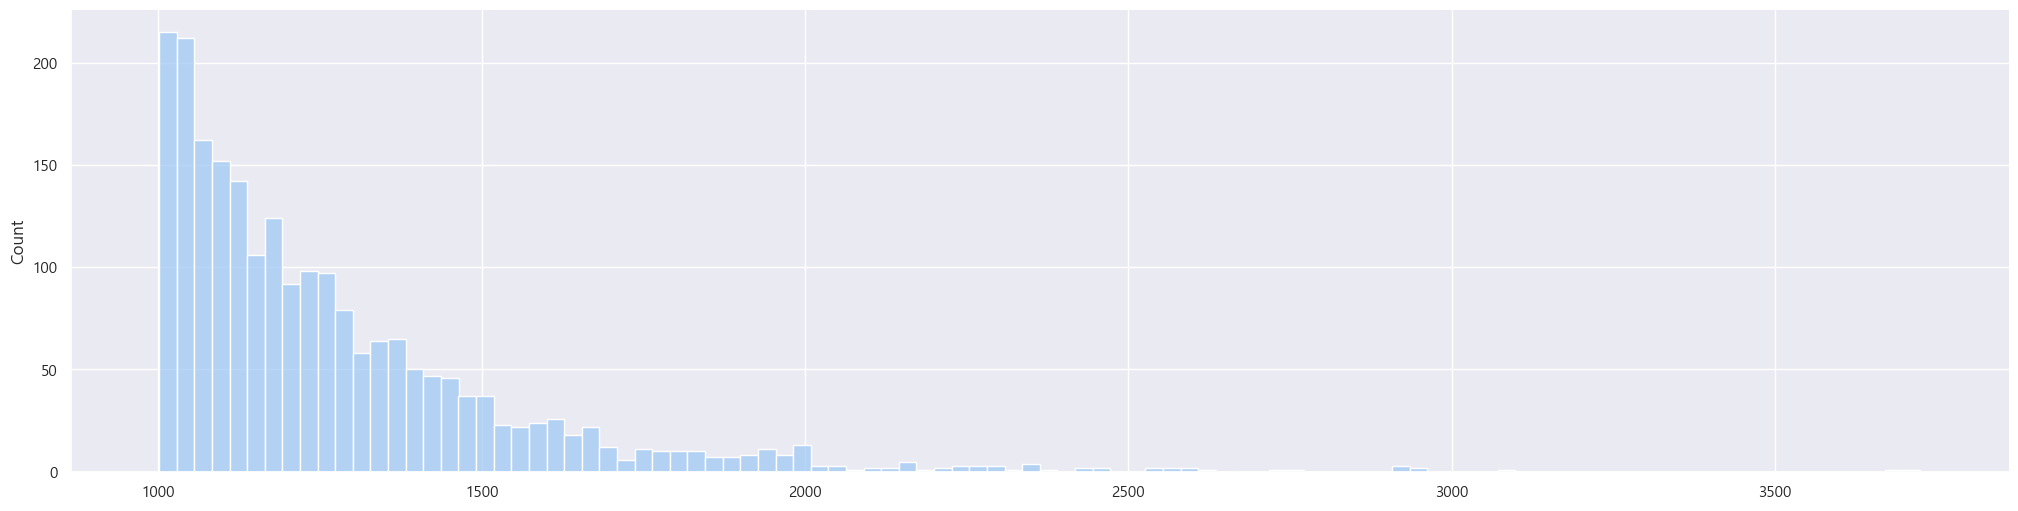

In [112]:
plt.figure(figsize=(25, 6))
sns.histplot(data=top_user, x=top_user.values, bins = 100)
plt.show()

In [115]:
df.groupby('user_id')['order_id'].count().value_counts()

order_id
32      1570
31      1569
38      1562
42      1544
33      1523
        ... 
1529       1
1590       1
1397       1
1533       1
1584       1
Name: count, Length: 1725, dtype: int64